In [34]:
import os
import shutil
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

In [12]:
print(os.getcwd())

D:\Kuliah\Semester 6\PCD\Tugas Akhir


In [23]:
print(os.listdir("..//Tugas Akhir//banana_data//data"))


['testing', 'training']


In [27]:
train_fruit_images = []
train_fruit_labels = [] 
for directory_path in glob.glob("data/training/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_fruit_images.append(img)
        train_fruit_labels.append(fruit_label)
train_fruit_images = np.array(train_fruit_images)
train_fruit_labels = np.array(train_fruit_labels)

In [28]:
train_fruit_labels

array([], dtype=float64)

## VERSI 1.0 : SPLIT DULU BARU DIUBAH JADI ARRAY  (RGB SAJA)

In [10]:
folder_path = '../Tugas Akhir/tes2/dataset'  # Path folder yang berisi gambar
training_path= '../Tugas Akhir/tes2/training'  # Path folder untuk data pelatihan
testing_path = '../Tugas Akhir/tes2/testing'  # Path folder untuk data pengujian
split_ratio = 0.8  # Rasio pembagian data (misalnya 0.8 berarti 80% pelatihan dan 20% pengujian)

# Membuat folder untuk data pelatihan dan pengujian jika belum ada
os.makedirs(training, exist_ok=True)
os.makedirs(testing, exist_ok=True)

# Mengambil daftar nama file gambar dalam folder
img_files = os.listdir(folder_path)

# Mengacak urutan file gambar
random.shuffle(img_files)

# Menghitung jumlah data untuk pelatihan dan pengujian berdasarkan rasio pembagian
train_count = int(len(img_files) * split_ratio)
test_count = len(img_files) - train_count

# Memindahkan data gambar ke folder pelatihan dan pengujian
for i, filename in enumerate(img_files):
    src_path = os.path.join(folder_path, filename)
    if i < train_count:
        dst_path = os.path.join(training_path, filename)
    else:
        dst_path = os.path.join(testing_path, filename)
    shutil.copy(src_path, dst_path)

print('Data berhasil dibagi menjadi folder pelatihan dan pengujian.')
print('Jumlah data pelatihan:', train_count)
print('Jumlah data pengujian:', test_count)

Data berhasil dibagi menjadi folder pelatihan dan pengujian.
Jumlah data pelatihan: 947
Jumlah data pengujian: 237


In [24]:
#TRAINING IMAGE
#ekstrak fitur
train_img=[]     
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resize semua gambarnya

    train_img.append(resized)
train_img = np.array(train_img)

#ekstrak label
train_label=[]
for i in os.listdir(training_path):
    if i.split(" ")[0] == "underripe":
        train_label.append(0)
    elif i.split(" ")[0] =="ripe":
        train_label.append(1)
    elif i.split(" ")[0] == "overripe":
        train_label.append(2)
train_label = np.array(train_label)

In [25]:
print(train_img.shape)
print(train_label.shape)

(947, 120, 120, 3)
(947,)


In [29]:
#TESTING IMAGE
#ekstrak fitur
test_img=[]     
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path testing 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resize semua gambarnya

    test_img.append(resized)
test_img = np.array(test_img)

#ekstrak label
test_label=[]
for i in os.listdir(testing_path):
    if i.split(" ")[0] == "underripe":
        test_label.append(0)
    elif i.split(" ")[0] =="ripe":
        test_label.append(1)
    elif i.split(" ")[0] == "overripe":
        test_label.append(2)
test_label = np.array(test_label)

In [30]:
print(test_img.shape)
print(test_label.shape)

(237, 120, 120, 3)
(237,)


In [63]:
#DATA SPLITING
Xtrain, Xtest = train_img, test_img
Ytrain, Ytest = train_label, test_label

# Xtrain = Xtrain/255
# Xtest = Xtest/255

# #Make a flattened version for some of our models
# Xflat_train = Xtrain.reshape(Xtrain.shape[0], 120*120*3)
# Xflat_test = Xtest.reshape(Xtest.shape[0], 120*120*3)

print('Original Sizes:', Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
# print('Flattened:', Xflat_train.shape, Xflat_test.shape)


Original Sizes: (947, 120, 120, 3) (237, 120, 120, 3) (947,) (237,)


In [71]:
#Reshape
Xtr = Xtrain.reshape(947,43200)
#Reshape
Xts = Xtest.reshape(237,43200)

In [72]:
Xtr.shape

(947, 43200)

In [43]:
120*120*3

43200

In [73]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(Xtr,Ytrain)

RandomForestClassifier()

In [88]:
#MODELING SVM
from sklearn.svm import SVC
smodel=SVC()
smodel.fit(Xtr,Ytrain)

SVC()

In [89]:
#akurasinya svm
smodel.score(Xts,Ytest)

0.5611814345991561

In [74]:
#akurasinya rf
rmodel.score(Xts,Ytest)

0.5738396624472574

In [84]:
urutan = 3
prediksi = rmodel.predict(Xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")



Kematengan


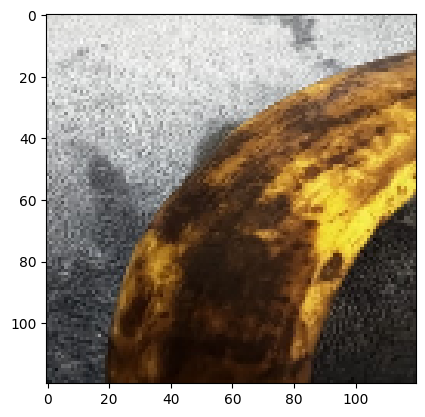

In [85]:
plt.imshow(Xtest[3])

## VERSI 1.1 : SPLIT DULU BARU DIUBAH JADI ARRAY  (RGB HA)

In [116]:
#TRAINING
train_loc = r'D:/Kuliah/Semester 6/PCD/Tugas Akhir/tes2/training'
#ekstrak fitur
train_img1=[]     #list for features
for i in os.listdir(train_loc):
    img=cv2.imread(os.path.join(train_loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    train_img1.append(resized)
    
train_img2 = []  # list for features
for i in os.listdir(train_loc):
    img = cv2.imread(os.path.join(train_loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel
    resized=cv2.resize(h_channel,(120,120)) 
    train_img2.append(resized)
    
train_img3 = []  # list for features
for i in os.listdir(train_loc):
    img = cv2.imread(os.path.join(train_loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel
    resized=cv2.resize(a_channel,(120,120)) 
    train_img3.append(resized)

train_img1 = np.array(train_img1)
train_img2 = np.array(train_img2)
train_img3 = np.array(train_img3)

train_fitur = np.empty((len(train_img1), 120, 120, 5), dtype=np.uint8)
train_fitur[:, :, :, :3] = train_img1[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
train_fitur[:, :, :, 3] = train_img2  # H channel from gembor_arr
train_fitur[:, :, :, 4] = train_img3  # a channel from gember_arr

train_label=[]
for i in os.listdir(train_loc):
    if i.split(" ")[0] == "underripe":
        train_label.append(0)
    elif i.split(" ")[0] =="ripe":
        train_label.append(1)
    elif i.split(" ")[0] == "overripe":
        train_label.append(2)

In [118]:
test_loc = '../Tugas Akhir/tes2/testing'
#TESTING
#ekstrak fitur
test_img1=[]     #list for features
for i in os.listdir(test_loc):
    img=cv2.imread(os.path.join(test_loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    test_img1.append(resized)
    
test_img2 = []  # list for features
for i in os.listdir(test_loc):
    img = cv2.imread(os.path.join(test_loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel
    resized=cv2.resize(h_channel,(120,120)) 
    test_img2.append(resized)
    
test_img3 = []  # list for features
for i in os.listdir(test_loc):
    img = cv2.imread(os.path.join(test_loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel
    resized=cv2.resize(a_channel,(120,120)) 
    test_img3.append(resized)

test_img1 = np.array(test_img1)
test_img2 = np.array(test_img2)
test_img3 = np.array(test_img3)

test_fitur = np.empty((len(test_img1), 120, 120, 5), dtype=np.uint8)
test_fitur[:, :, :, :3] = test_img1[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
test_fitur[:, :, :, 3] = test_img2  # H channel from gembor_arr
test_fitur[:, :, :, 4] = test_img3  # a channel from gember_arr

test_label=[]
for i in os.listdir(test_loc):
    if i.split(" ")[0] == "underripe":
        test_label.append(0)
    elif i.split(" ")[0] =="ripe":
        test_label.append(1)
    elif i.split(" ")[0] == "overripe":
        test_label.append(2)

In [119]:
#DATA SPLITING
Xtrain, Xtest = train_fitur, test_fitur
Ytrain, Ytest = train_label, test_label

In [121]:
#Reshape
Xtr = train_fitur.reshape(947,72000)
#Reshape
Xts = Xtest.reshape(237,72000)

In [122]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(Xtr,Ytrain)

RandomForestClassifier()

In [123]:
#akurasinya rf
rmodel.score(Xts,Ytest)

0.7721518987341772

Kematengan


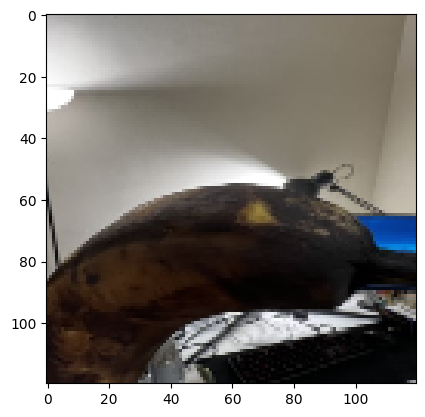

In [143]:
urutan = 1
prediksi = rmodel.predict(Xts[urutan].reshape(1,-1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")

plt.imshow(test_img[urutan])
plt.show()

## VERSI 2.1 : UBAH JADI ARRAY DULU BARU DI SPLIT (RGB aja)

In [ ]:
#Kodingannya mulai dari sini

In [3]:
loc = r'D:/Kuliah/Semester 6/PCD/Tugas Akhir/tes1/dataset'

In [4]:
label=[]
for i in os.listdir(loc):
    if i.split(" ")[0] == "underripe":
        label.append(0)
    elif i.split(" ")[0] =="ripe":
        label.append(1)
    elif i.split(" ")[0] == "overripe":
        label.append(2)

In [24]:
# ini coretan
images = []
for file_name in os.listdir(loc):
    # Memeriksa apakah file memiliki ekstensi .jpg atau .png
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        file_path = os.path.join(loc, file_name)
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
images = np.array(images)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17452\1065205741.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [29]:
#ekstrak fitur
gambar=[]     #list for features
for i in os.listdir(loc):
    img=cv2.imread(os.path.join(loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(240,240))   #resizing all imgaes to reduce computation and also give each image a dimension

    gambar.append(resized)

In [9]:
np.array(gambar).shape

(1184, 240, 240, 3)

In [86]:
print(len(images))
print(len(label))

1184
1184


In [5]:
#ekstrak fitur
gambar=[]     #list for features
for i in os.listdir(loc):
    img=cv2.imread(os.path.join(loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    

    gambar.append(resized)

In [6]:
gembor = []  # list for features
for i in os.listdir(loc):
    img = cv2.imread(os.path.join(loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel

    gembor.append(h_channel)

In [7]:
gember = []  # list for features
for i in os.listdir(loc):
    img = cv2.imread(os.path.join(loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel

    gember.append(a_channel)

In [8]:
import numpy as np

gambar_arr = []
gembor_arr = []
gember_arr = []

for i in range(len(gambar)):
    img = gambar[i]
    img_h = gembor[i]
    img_a = gember[i]
    
    # Resize gambar, gembor, dan gember ke ukuran yang sama
    img_resized = cv2.resize(img, (120, 120))
    img_h_resized = cv2.resize(img_h, (120, 120))
    img_a_resized = cv2.resize(img_a, (120, 120))
    
    gambar_arr.append(img_resized)
    gembor_arr.append(img_h_resized)
    gember_arr.append(img_a_resized)

gambar_arr = np.array(gambar_arr)
gembor_arr = np.array(gembor_arr)
gember_arr = np.array(gember_arr)

fitur = np.empty((len(gambar_arr), 120, 120, 5), dtype=np.uint8)
fitur[:, :, :, :3] = gambar_arr[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
fitur[:, :, :, 3] = gembor_arr  # H channel from gembor_arr
fitur[:, :, :, 4] = gember_arr  # a channel from gember_arr

In [9]:
fitur.shape

(1184, 120, 120, 5)

In [30]:
#definisikan X dan Y
X = np.array(gambar)
Y = np.array(label)
X = X.reshape(1184,172800)

In [33]:
#definisikan X dan Y part 2
X = np.array(fitur)
Y = np.array(label)
X = X.reshape(1184,72000)

In [11]:
#split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [12]:
#Bikin model randomforest
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [13]:
#akurasinya #2
rmodel.score(xtest,ytest)

0.8185654008438819

In [33]:
#akurasinya
rmodel.score(xtest,ytest)

0.6160337552742616

In [54]:
print(xtest[urutan].shape)

(72000,)


In [59]:
urutan = 10
prediksi = rmodel.predict(xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")



Kematengan


In [75]:
xtest[urutan].shape(120, 120, 3)

SyntaxError: invalid non-printable character U+00A0 (105591993.py, line 1)

In [81]:
urutan = 10
prediksi = rmodel.predict(xtest[urutan].reshape(1, -1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")


plt.imshow(xtest[urutan].reshape(24000,24000,3))
plt.show()

Kematengan


ValueError: cannot reshape array of size 72000 into shape (24000,24000,3)

In [80]:
72000/3

24000.0

In [17]:
cv2.imshow("p",xtest[10])
cv2.waitKey(0)

-1

In [28]:
from math import sqrt
sqrt(72000)

268.32815729997475

In [47]:
#bikin model svm
from sklearn.svm import SVC
smodel=SVC()
smodel.fit(xtrain,ytrain)

SVC()

In [48]:
#Training Accuracy
smodel.score(xtest,ytest)

0.6582278481012658

Mateng


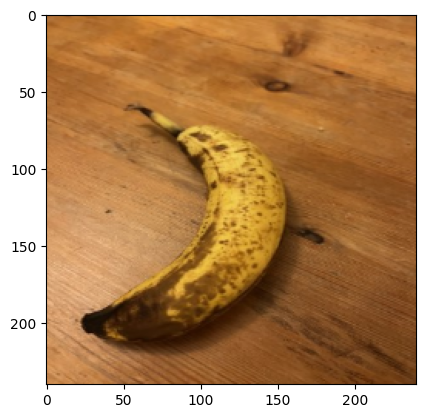

In [50]:
#testing
urutan = 10
prediksi = smodel.predict(xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 1:
    print("Kematengan")

import matplotlib.pyplot as plt
plt.imshow(xtest[urutan].reshape(240,240,3))
plt.show()

In [19]:
img = cv2.imread('D:/Kuliah/Semester 6/PCD/Tugas Akhir/tes1/dataset/ripe (22).jpg')

img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


In [20]:
cv2.imshow("gg",img)
cv2.waitKey(0)

-1